In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv('data_with_labels.csv')
data.head()

,State,Year,Slab,MultiBeam,GirderFloorBeamSystem,TeaBeam,BoxBeamMultiple,ArchDeck,Culvert,TrussThru,Frame,BoxBeamSingle,TrussDeck,Label
0,ALABAMA,1992,0.326781,0.257628,0.292597,0.417426,0.299461,0.850491,0.134380,0.887495,0.851453,0.014134,0.805998,1
1,ALASKA,1992,0.082470,0.268559,0.115272,0.172852,0.264056,0.141922,1.000000,0.494670,0.137405,0.000000,0.030212,1
2,ARIZONA,1992,0.183139,0.177047,0.096338,0.224856,0.137023,0.320507,0.061438,0.927453,0.197519,0.087231,0.413820,1
3,ARKANSAS,1992,0.170860,0.329185,0.222030,0.323595,0.192091,0.369497,0.054384,0.672889,0.131139,0.000000,0.586634,1
4,CALIFORNIA,1992,0.218799,0.497345,0.885631,0.344593,0.342176,0.623282,0.126319,0.941477,0.000000,0.000000,0.621819,1


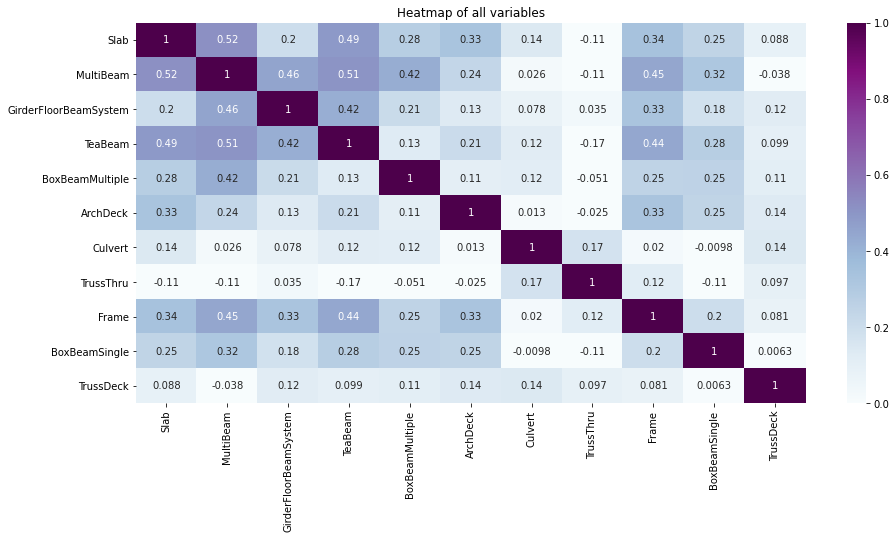

In [3]:
corr_mat = data.iloc[:,2:-1].corr()
plt.figure(figsize=(15, 7)) 
ax = sns.heatmap(corr_mat, cmap="BuPu", vmin = 0, annot = True);
ax.set_title("Heatmap of all variables");

plt.show()

# Logistic Regression

In [4]:
X = np.array(data.iloc[:,2:-1])
X.shape

(1144, 11)

In [5]:
y = np.array(data['Label'])
y

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [6]:
# split data into test train set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_proba = log_reg.predict_proba(X_test)[:,1]
y_pred = log_reg.predict(X_test)
y_pred

array([1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1],
      dtype=int64)

In [8]:
len(y_test)

286

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


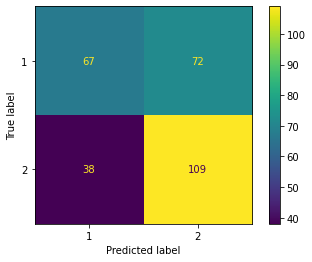

In [9]:
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

In [10]:
score = accuracy_score(y_test, y_pred)
print("Test Accuracy Score:", score*100, '%')

Test Accuracy Score: 61.53846153846154 %


In [11]:
f1_Score = f1_score(y_test, y_pred)
print("f1-Score:", f1_Score*100, '%')

f1-Score: 54.91803278688524 %


In [12]:
# threshold = 0.5
# y_pred2 = (y_proba > threshold).astype(int)
# score = accuracy_score(y_test, y_pred2)
# print("Test Accuracy Score:", score*100, '%')

There are 7 types of cross-validation methods namely amongst others: holdout, K-fold, stratified K-fold, Leave-p-out, Leave-one-out, Rolling, Monte Carlo. K-fold and stratified K-fold are used. The difference is that while K-fold does random sampling, stratified K-fold does stratified sampling.

**Using K-fold cross validation**

In [18]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression()
model = model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy:',
      np.mean(scores)*100, '%')

y_pred = model.predict(X_test)
y_pred
f1_Score = f1_score(y_test, y_pred)
print("f1-Score:", f1_Score*100, '%')

Accuracy: 62.112175102599174 %
f1-Score: 54.91803278688524 %


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


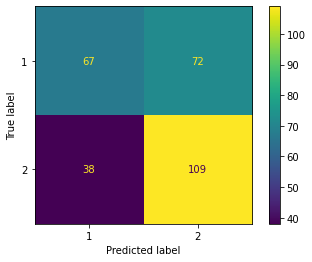

In [23]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

**Using Stratified K-fold validation**

In [21]:
# Create  classifier object.
log_reg2 = LogisticRegression()

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scores = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    log_reg2.fit(x_train_fold, y_train_fold)
    scores.append(log_reg2.score(x_test_fold, y_test_fold))
    
print('Accuracy:',
      np.mean(scores)*100, '%')
y_pred = log_reg2.predict(X_test)
y_pred
f1_Score = f1_score(y_test, y_pred)
print("f1-Score:", f1_Score*100, '%')

Accuracy: 61.71319603356218 %
f1-Score: 58.46153846153847 %


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


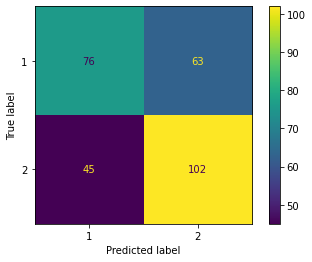

In [24]:
plot_confusion_matrix(log_reg2, X_test, y_test)
plt.show()

# ROC Curve

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    #plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_proba)
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, y_pred)


# The first plot is prefered, Tunde.

ValueError: y_true takes value in {1, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

# ROC AUC

In [33]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.6118


In [34]:
# Alternatively..

score = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.6705


The classifiers performs around average when classifying the test set.

# References

https://www.analyticssteps.com/blogs/7-types-cross-validation

https://medium.com/@lily_su/logistic-regression-accuracy-cross-validation-58d9eb58d6e6

https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

https://datascience.stackexchange.com/questions/62892/k-fold-cross-validation-reduces-accuracy

https://towardsdatascience.com/interpreting-roc-curve-and-roc-auc-for-classification-evaluation-28ec3983f077